In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("medical_students_dataset.csv")

In [3]:
data.shape

(200000, 13)

In [4]:
data.head(5)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


# Preprocessing

In [5]:
data.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [7]:
data.isnull().sum()

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [8]:
data.dropna(inplace = True)


In [9]:
data.isnull().sum()

Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

In [10]:
data.duplicated().sum()

6456

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data.duplicated().sum()

0

In [13]:
#Adding a new column
data['Age_sqrt'] = np.sqrt(data['Age'])

In [14]:
data.head(3)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking,Age_sqrt
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No,5.656854
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No,5.291503
11,12.0,34.0,Female,182.416302,76.371050,AB,22.950992,98.118274,86.0,97.0,247.0,No,No,5.830952


# EDA

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr
import seaborn as sns

In [16]:
data['Gender'].value_counts()

Female    22224
Male      22113
Name: Gender, dtype: int64

([<matplotlib.axis.XTick at 0x19974549bb0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

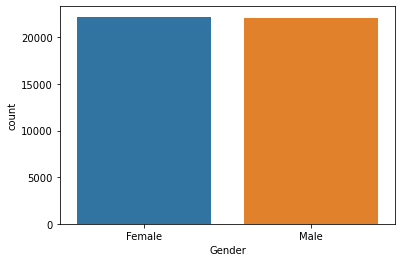

In [17]:

sns.countplot(x = data['Gender'])
plt.xticks([0, 1], ['Female', 'Male'])

<AxesSubplot:xlabel='Age', ylabel='Weight'>

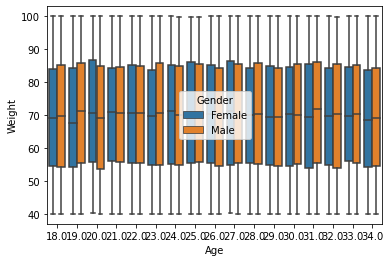

In [18]:
sns.boxplot(x = 'Age', y = 'Weight', data = data, hue = 'Gender')

<StemContainer object of 3 artists>

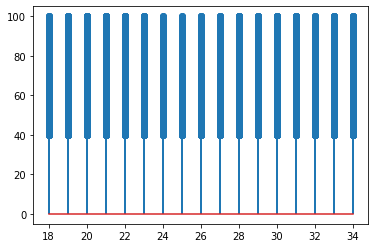

In [19]:
plt.stem(data['Age'], data['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

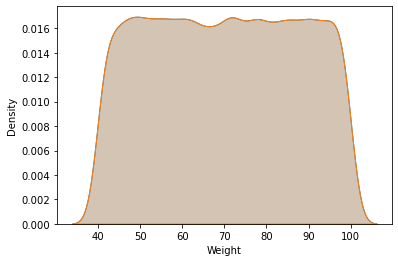

In [20]:
sns.kdeplot(data = data['Weight'], fill = True, label = 'Male')
sns.kdeplot(data = data['Weight'], fill = True, label = 'Female')

<AxesSubplot:xlabel='Gender', ylabel='count'>

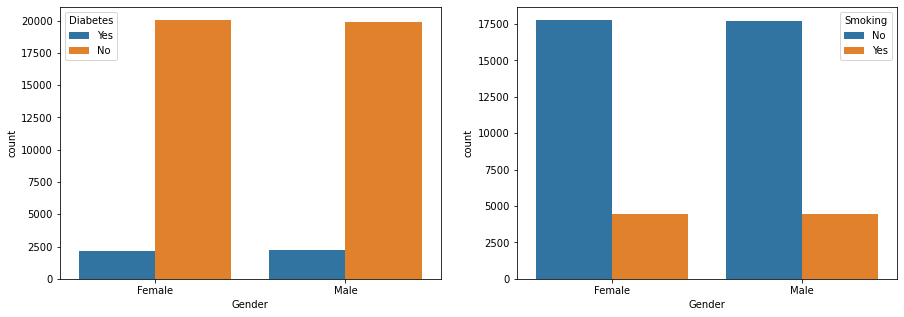

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot(x = 'Gender', hue = 'Diabetes', data = data, ax = ax[0])
sns.countplot(x = 'Gender', hue = 'Smoking', data= data, ax = ax[1])

<AxesSubplot:xlabel='Blood Type', ylabel='count'>

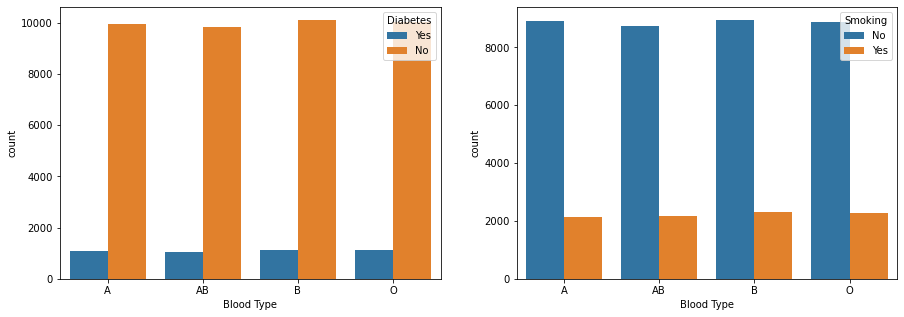

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.countplot(x = 'Blood Type', hue = 'Diabetes', data = data, ax = ax[0])
sns.countplot(x = 'Blood Type', hue = 'Smoking', data = data, ax = ax[1])

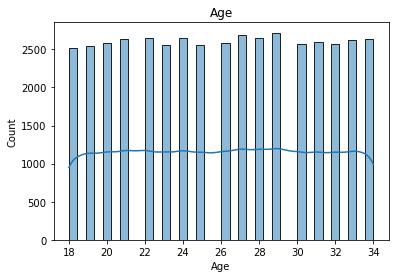

In [23]:
sns.histplot(data, x = 'Age', kde = True)
plt.title('Age')
plt.show()

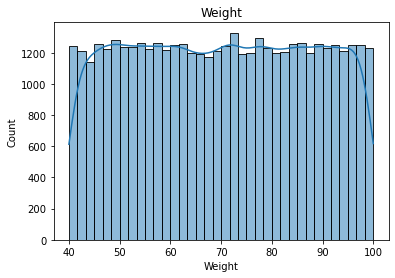

In [24]:
sns.histplot(data, x = 'Weight', kde = True)
plt.title('Weight')
plt.show()